In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

W poniższym przykładzie wizualizujemy reszty w modelu regresji liniowej.

In [11]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''

In [12]:
from io import StringIO
df = pd.read_csv(StringIO(data_str), sep=r'\s+')
df.head(11)

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East_Midlands,4.89,3.34
4,West_Midlands,5.63,3.47
5,East_Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


In [13]:
X = df.Tobacco
y = df.Alcohol

In [14]:
import sklearn.linear_model as lm
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(np.vstack(X[:-1]) ,y[:-1]);
print(lr.coef_)
print(lr.intercept_)

[1.00589583]
2.0412230868382113


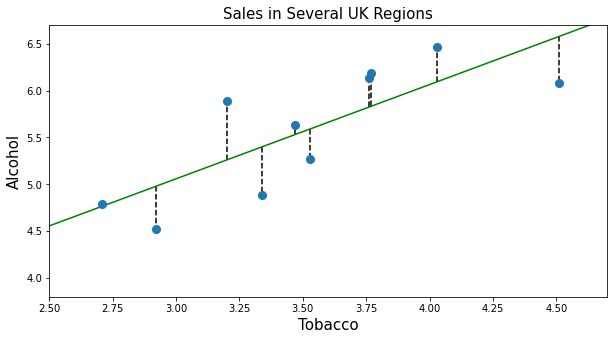

In [15]:
x_f_lr = np.linspace(1., 5., 200)
f_lr = lambda x: lr.coef_ * x +lr.intercept_
y_f_lr = f_lr(x_f_lr)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_xlabel('Tobacco', fontsize=15)
ax.set_ylabel('Alcohol', fontsize=15)
ax.set_title('Sales in Several UK Regions', fontsize=15)
ax.set_xlim([2.5, 4.7])
ax.set_ylim([3.8, 6.7])
ax.plot(x_f_lr, y_f_lr, 'g');
ax.plot(X[:-1] ,y[:-1],'o', ms=8)

for i in np.arange( len(X)-1 ):
    ax.vlines(X[i], f_lr(X[i]) , y[i], colors='k', linestyles='--')

# ax.plot(3., f_lr(3.), 'or', ms=10);
plt.show()